# World University Ranking

Investigate the best universities in the world

In [1]:
import matplotlib
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import pandas as pd
import seaborn as sns
import os
import re
import geopandas as gpd

# Some magic that tells jupyter to put graphs and things in the notebook 
# instead of the default behaviour which is to save it as a file.
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)
# give us a style state to go back to
saved_style_state = matplotlib.rcParams.copy()

In [14]:
if os.path.isfile("timesData.csv"):
    filepath = "timesData.csv"
    print "loading from file"
else:
    filepath = "https://www.kaggle.com/mylesoneill/world-university-rankings/downloads/timesData.csv"
    print "loading from the Internet"
wur_data = pd.read_csv(filepath)
print "done"

loading from file
done


In [15]:
wur_data.head()
# get data info
wur_data.info()
# have a look at row
wur_data.ix[1];

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
world_rank                2603 non-null object
university_name           2603 non-null object
country                   2603 non-null object
teaching                  2603 non-null float64
international             2603 non-null object
research                  2603 non-null float64
citations                 2603 non-null float64
income                    2603 non-null object
total_score               2603 non-null object
num_students              2544 non-null object
student_staff_ratio       2544 non-null float64
international_students    2536 non-null object
female_male_ratio         2370 non-null object
year                      2603 non-null int64
dtypes: float64(4), int64(1), object(9)
memory usage: 284.8+ KB


In [16]:
# zip dtype with row_1 (and then change number type from string to integer or float)
dtype = zip([type(x) for x in wur_data.ix[1]], wur_data.ix[1], wur_data.ix[1].keys())
dtype;

In [17]:
# some world_rank values contain '-' and '=' and some world ranks correspond to more than 6 universities.
# drop rows based on column value which contains '-'
wur_data = wur_data[wur_data['world_rank'].str.contains('-') == False]
# replace '=' with ''
wur_data['world_rank'] = wur_data['world_rank'].apply(lambda x: re.sub('=', '', x))
# change data type from string to integer
wur_data['world_rank'] = wur_data['world_rank'].apply(int)
wur_data['world_rank'];

In [18]:
# international, income and total_score just need to change data type from string to float
# international
boo_international = wur_data['international'].str.contains('-') == False
wur_data['international'] = wur_data['international'][boo_international].apply(float)
# income has NAN values
boo1_income = wur_data['income'].isnull() == False
boo2_income = wur_data['income'] != '-'
wur_data['income'] = wur_data['income'][boo1_income][boo2_income].apply(float)
# total_score
wur_data['total_score'] = wur_data['total_score'].apply(float);

In [19]:
# num_students
boo_num_students = wur_data['num_students'].isnull() == False
wur_data['num_students'] = wur_data['num_students'][boo_num_students].apply(lambda x: re.sub(',', '', x)).apply(float)
wur_data['num_students'];

In [20]:
# convert a string percentage to a float
wur_data['international_students'] = wur_data['international_students'].str.strip('%').apply(float)
wur_data['international_students'] = [x/100 for x in wur_data['international_students']]
wur_data['international_students'];

In [21]:
# convert female_male_ratio to a float
x = wur_data['female_male_ratio'][wur_data['female_male_ratio'].isnull() == False].str[:2].apply(float)
y = wur_data['female_male_ratio'][wur_data['female_male_ratio'].isnull() == False].str[4:].apply(float)
wur_data['female_male_ratio'][wur_data['female_male_ratio'].isnull() == False] = [m/n for m, n in zip(x, y)]
wur_data['female_male_ratio'];

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [22]:
wur_data.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,20152.0,8.9,0.25,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,2243.0,6.9,0.27,0.492537,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,11074.0,9.0,0.33,0.587302,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,15596.0,7.8,0.22,0.724138,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,NaN,94.2,7929.0,8.4,0.27,0.818182,2011


In [23]:
wur_data.describe()

,world_rank,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,year
count,1201.000000,1201.000000,1192.000000,1201.000000,1201.000000,1061.000000,1201.000000,1182.000000,1182.000000,1181.000000,1201.000000
mean,100.233972,50.730808,59.478523,52.252040,76.928726,54.230914,59.846128,23891.501692,15.932318,0.196274,2013.501249
std,57.634735,16.912699,21.209330,19.661541,15.535493,22.722593,12.803446,13635.554030,9.437269,0.101746,1.708374
min,1.000000,15.900000,14.800000,13.100000,8.600000,24.200000,41.400000,462.000000,3.600000,0.010000,2011.000000
25%,50.000000,38.300000,42.175000,37.100000,66.700000,36.300000,50.300000,14221.000000,10.200000,0.120000,2012.000000
50%,100.000000,47.500000,59.500000,48.500000,78.800000,45.800000,56.000000,22616.000000,14.700000,0.180000,2014.000000
75%,150.000000,60.200000,77.700000,64.700000,89.200000,68.200000,66.200000,31326.000000,18.700000,0.260000,2015.000000
max,200.000000,99.700000,100.000000,99.400000,100.000000,100.000000,96.100000,127431.000000,85.800000,0.540000,2016.000000


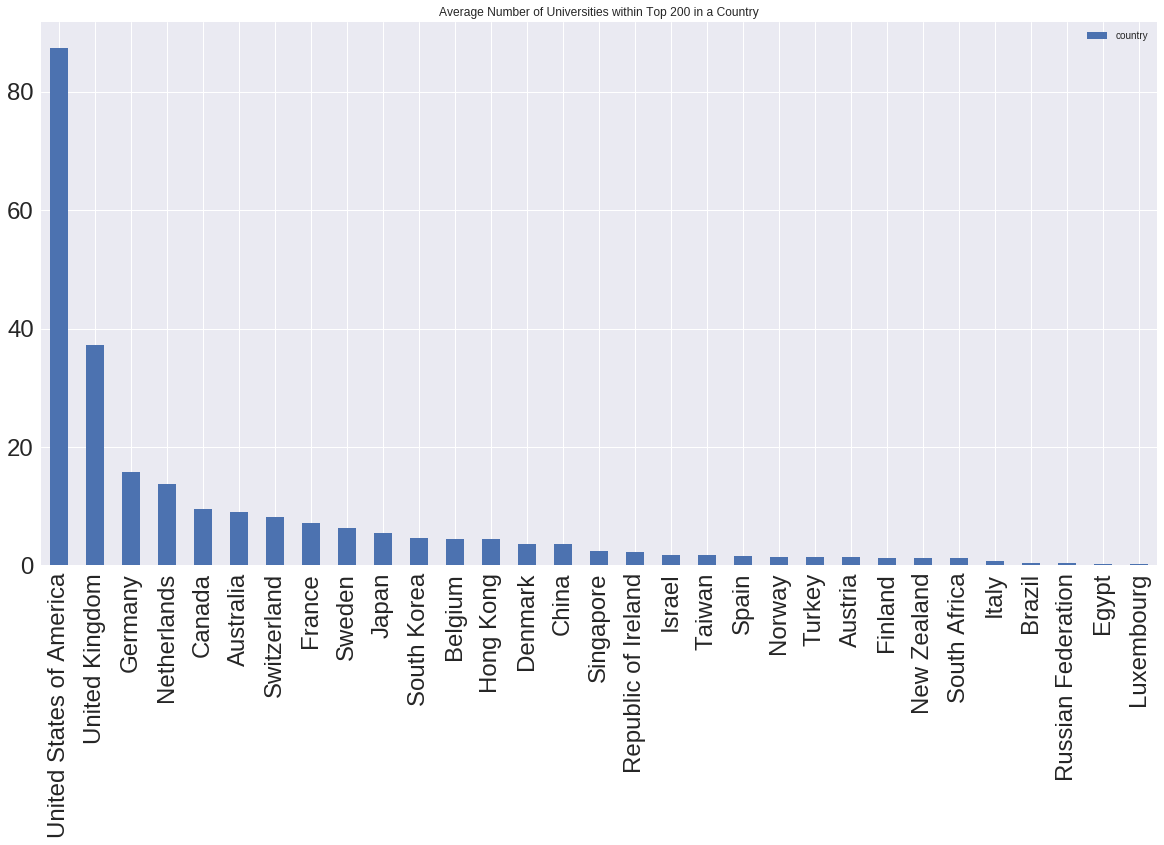

In [77]:
# average number of universities in a country across 6 years
num_years = abs(wur_data['year'].iloc[0] - wur_data['year'].iloc[-1])
country_uni = wur_data['country'].value_counts()/num_years
title = 'Average Number of Universities within Top 200 in a Country'
country_uni.sort_values(ascending = False).plot(kind = 'bar', title = title, fontsize = 24, legend=True)

In [25]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head()

,continent,gdp_md_est,geometry,iso_a3,name,pop_est
0,Asia,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,...",AFG,Afghanistan,28400000.0
1,Africa,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...,AGO,Angola,12799293.0
2,Europe,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,...",ALB,Albania,3639453.0
3,Asia,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,...",ARE,United Arab Emirates,4798491.0
4,South America,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...,ARG,Argentina,40913584.0


In [26]:
country_uni = country_uni.rename(index = {'United States of America': 'United States', 'South Korea': 'Korea', 'Republic of Ireland': 'Ireland', 'Russian Federation': 'Russia', })
country_uni['China'] = country_uni['China'] + country_uni['Hong Kong']
del country_uni['Hong Kong']
country_uni;

In [27]:
country_uni = country_uni.reindex(world['name'], fill_value = 0)
country_uni;

In [31]:
world['uni_per_country'] = country_uni.values

In [43]:
vmin = world['uni_per_country'].min()
vmax = world['uni_per_country'].max()

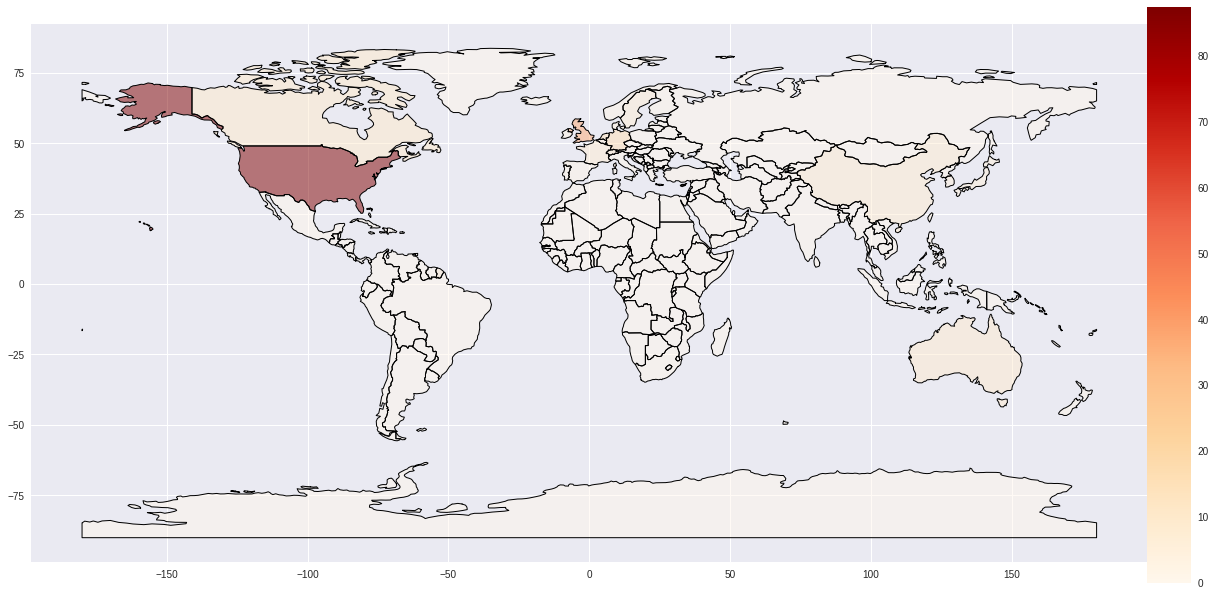

In [64]:
import shapely
ax = world.plot(column = 'uni_per_country', cmap="OrRd")
fig = ax.get_figure()
cax = fig.add_axes([0.9, 0.1, 0.03, 0.8])
sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
fig.colorbar(sm, cax=cax);

fig, ax = plt.subplots()
ax.set_aspect('equal')
world.plot(ax=ax, color='white', alpha=0)
world.plot(column = 'uni_per_country',ax=ax, cmap='OrRd', edgecolor='black', linewidth=2, alpha=1)
plt.show();

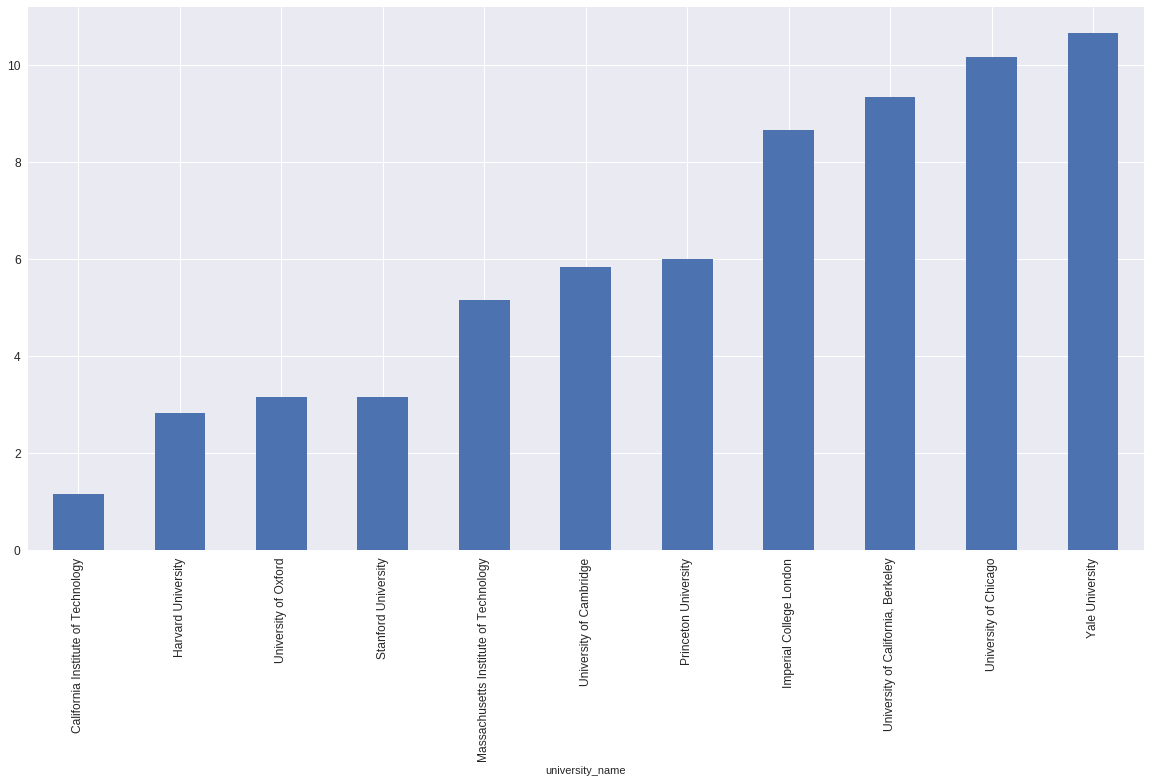

In [94]:
p_wr = wur_data.pivot_table(index = 'university_name', values = 'world_rank', aggfunc = np.mean)
p_wr.sort_values(ascending = True)[p_wr < 11].plot(kind = 'bar', fontsize = 12)

In [97]:
def hist(data, column, bins):
    # draw a histgram
    plt.hist(data[column].dropna(), bins = bins, normed = 1, facecolor='blue', alpha=0.75)
    plt.xlabel(column.title(), fontsize = 24)
    plt.ylabel('Probability', fontsize = 24)
    plt.title('{} Distribution'.format(column).title(), fontsize = 36)
    plt.grid(True)
    plt.show()

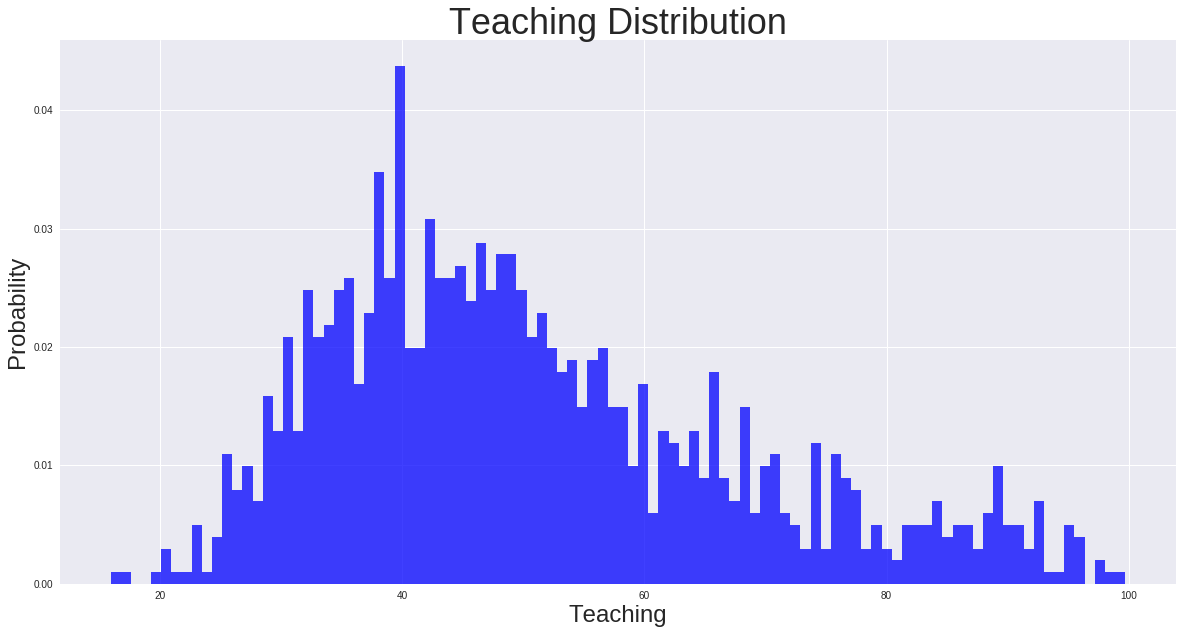

In [99]:
hist(wur_data, 'teaching', 100)

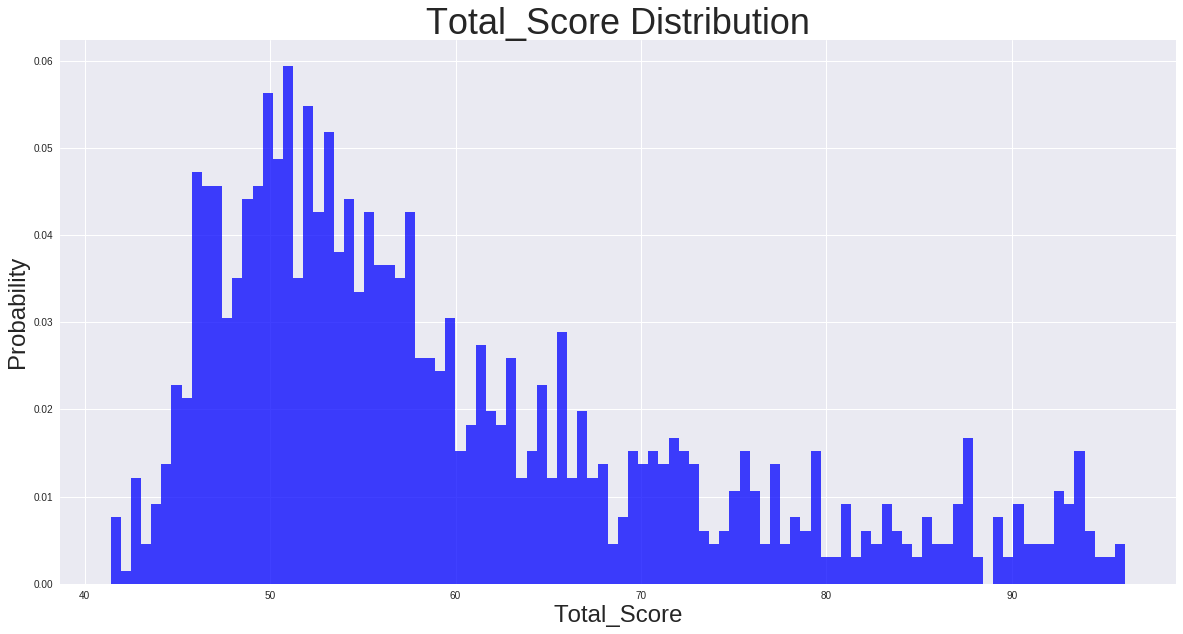

In [144]:
hist(wur_data, 'total_score')

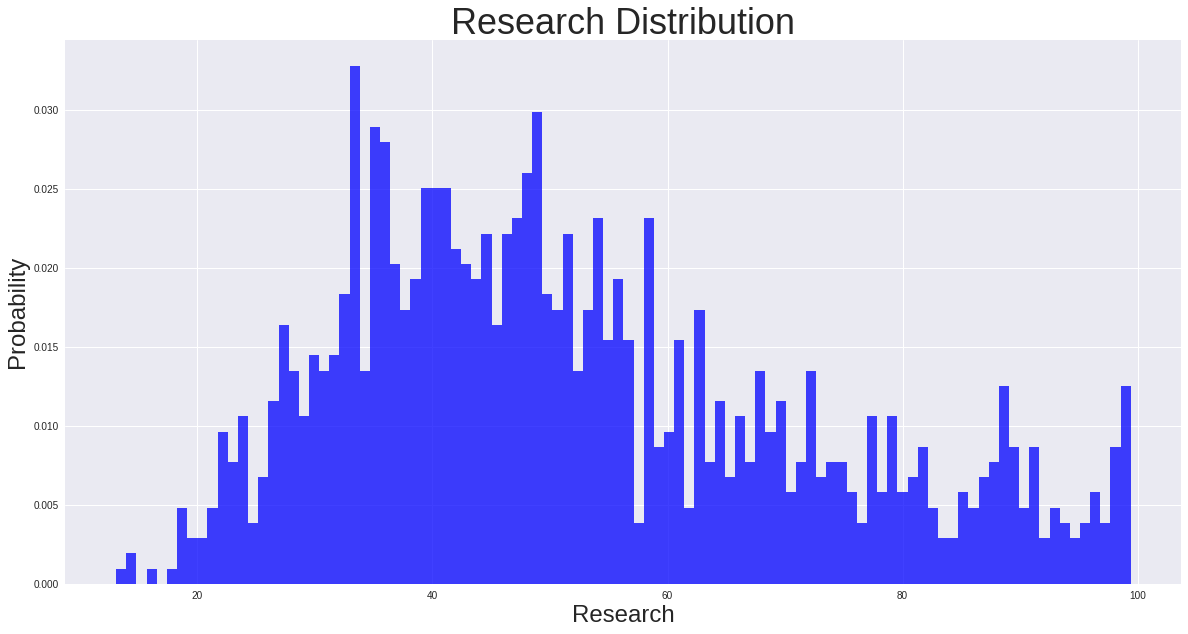

In [140]:
hist(wur_data, 'research')

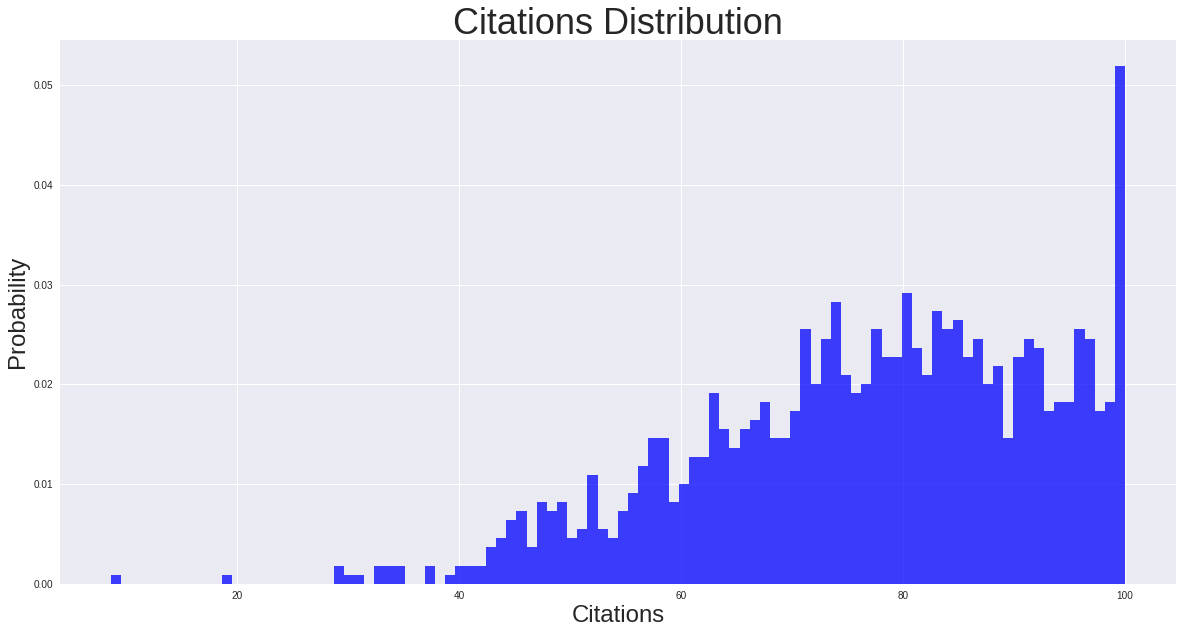

In [142]:
hist(wur_data, 'citations')

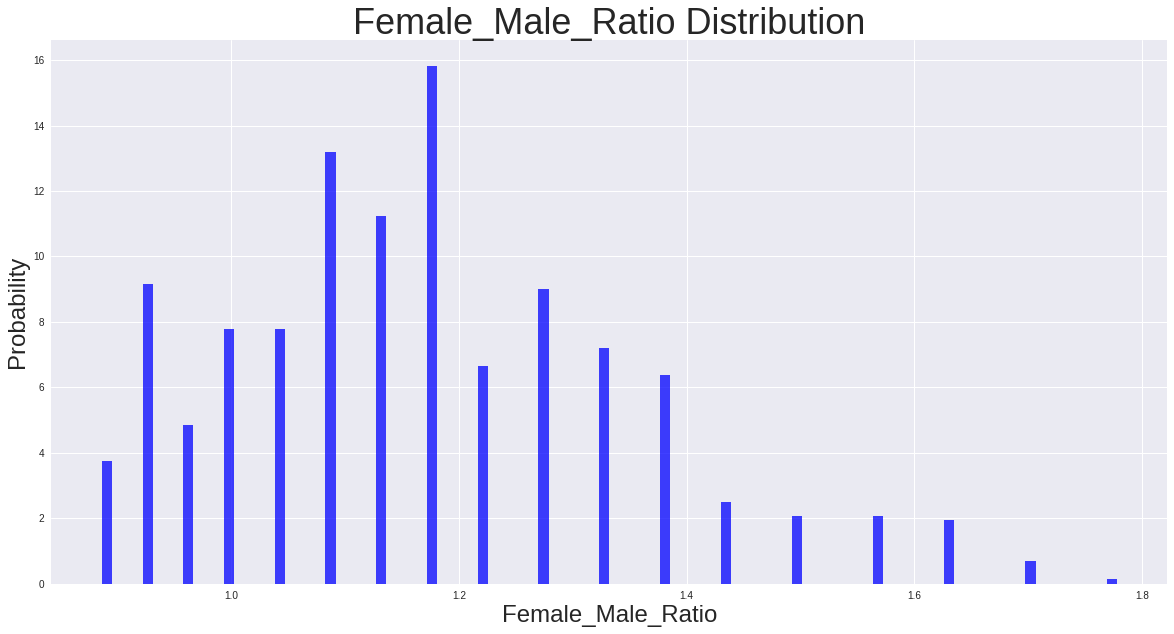

In [147]:
hist(wur_data, 'female_male_ratio')

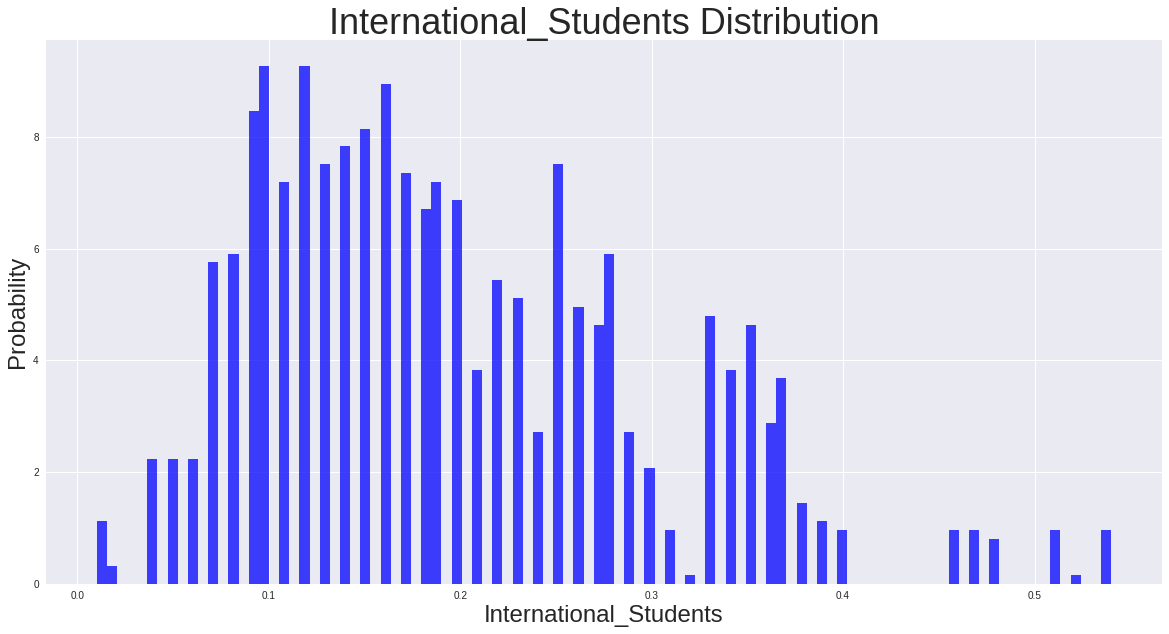

In [162]:
hist(wur_data, 'international_students')

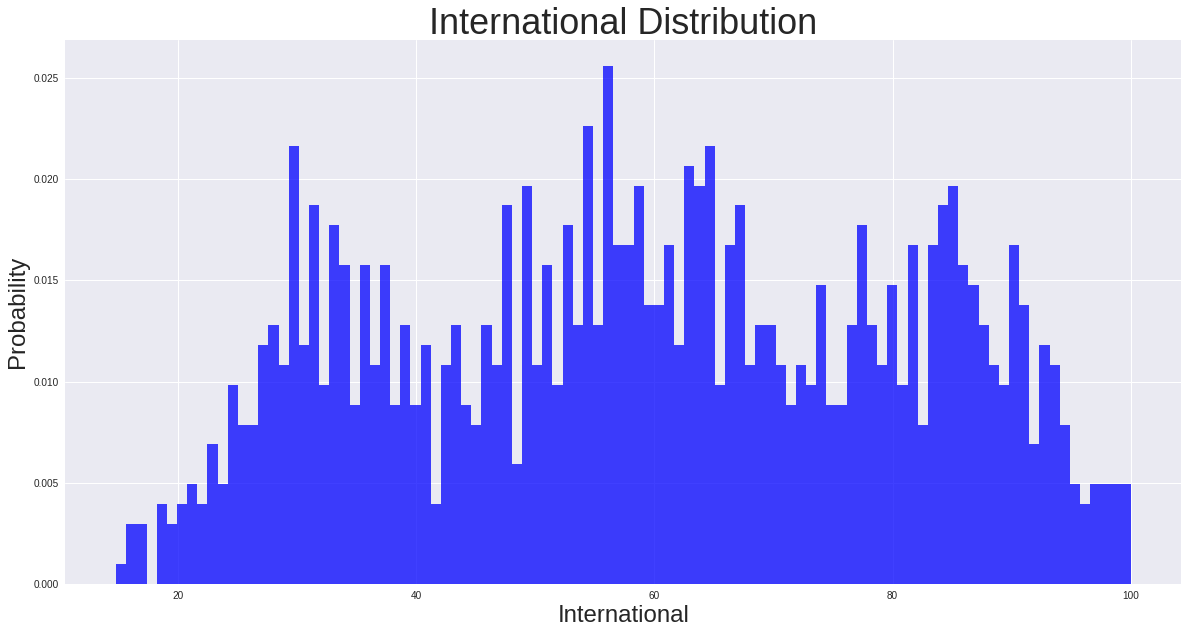

In [163]:
hist(wur_data, 'international')

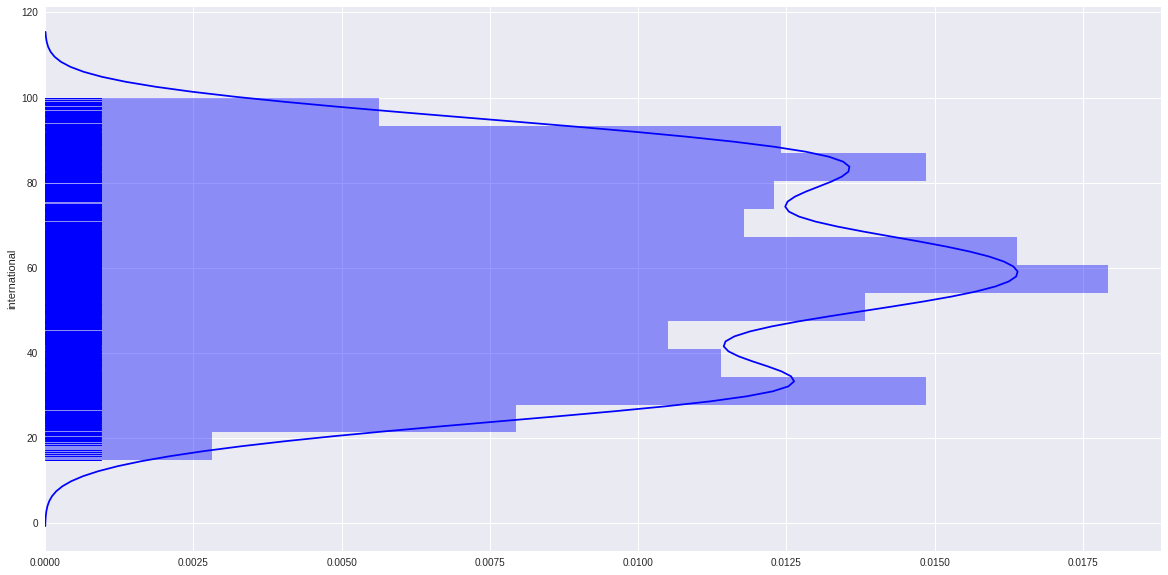

In [38]:
sns.distplot(wur_data['international'].dropna(), hist = True, kde = True, rug = True, vertical = True, color = 'blue')
sns.plt.show()

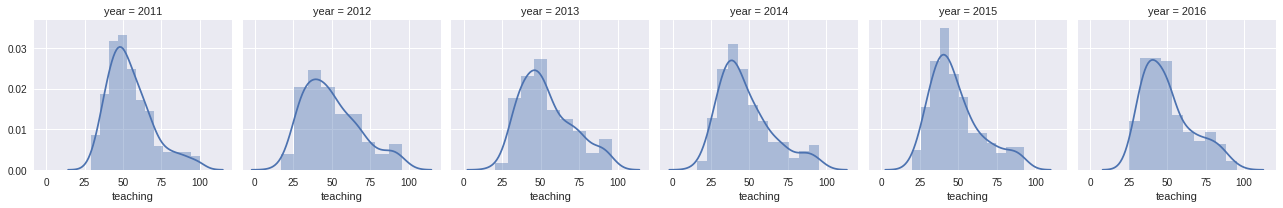

In [172]:
g = sns.FacetGrid(wur_data, col='year')
g.map(sns.distplot, "teaching")
sns.plt.show()

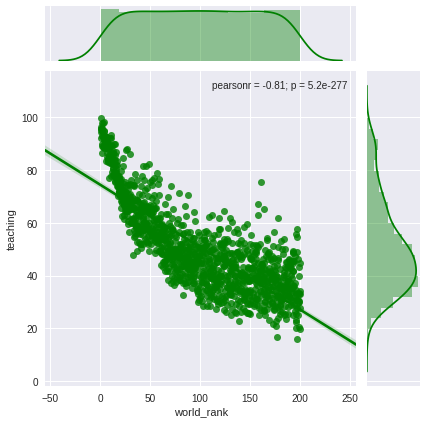

In [47]:
sns.jointplot(data=wur_data, x='world_rank', y='teaching', kind='reg', color='g')
sns.plt.show()

Pearson correlation coefficient is a measure of the linear correlation between two variables X and Y. 
It has a value between +1 and −1, where 
1 is total positive linear correlation, 0 is no linear correlation, and 
−1 is total negative linear correlation.

DataFrame.corr(method='pearson', min_periods=1)

In [112]:
dcorr = wur_data.corr()

The heatmap is a correlation matrix.

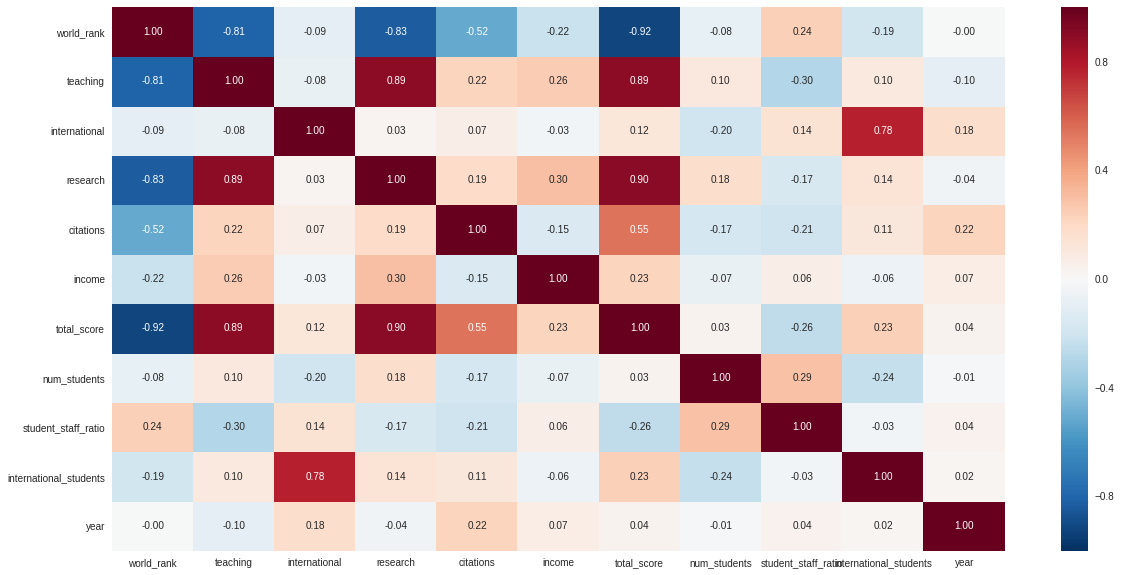

In [114]:
sns.heatmap(dcorr, annot=True, fmt=".2f")

Some relationships with high Pearson correlation coefficient (more than 0.75):

teaching -- total_score; research;

international -- international_students;

research -- total score; teaching;

total_score -- research; teaching;

In [ ]:
dcorr_0.75 =

In [40]:
matplotlib.rcParams.update(saved_style_state) # revert to regular matplotlib styles, not xkcd